In [1]:
import numpy as np
import matplotlib.pyplot as plt
import main_urnings as mu
import pandas as pd

In [37]:
player_ids = list(np.random.randint(10000,1001001, 1000000))
item_ids = list(np.random.randint(3000,3101, 1000000))

correct_answers = list(np.random.randint(0,2,1000000))

data = mu.AlsData(player_ids, item_ids, correct_answers)

players, items, ppunch, ipunch  = data.create_players_items(player_starting_score=5,item_starting_score=5,player_urn_size=10,item_urn_size=10, so_urn_size=100)

adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=True, adaptive_urn_type="second_order_urnings", window=10, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.2)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule, data=data)
adaptive_sim.play(n_games=None, test = False)

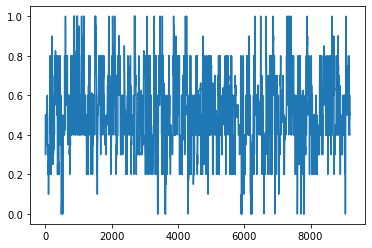

In [29]:
plt.plot(players[0].estimate_container)

In [2]:
df = pd.read_csv("df0507.csv")

player_ids = df.iloc[:,2].to_numpy()
item_ids = df.iloc[:,3].to_numpy()
correct_answers = df.iloc[:,5].to_numpy()


player_ids.shape


(3065222,)

In [3]:
data = mu.AlsData(player_ids, item_ids, correct_answers)

players_nochange, items_nochange, ppunch, ipunch  = data.create_players_items(player_starting_score=10,item_starting_score=50,player_urn_size=32,item_urn_size=100, so_urn_size=10)

adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=False, adaptive_urn_type="second_order_urnings", window=15, min_urn=8, max_urn=32, permutation_test=True, perm_p_val=0.1)
nochange = mu.Urnings(players = players_nochange, items = items_nochange, game_type=adaptive_rule, data=data)
nochange.play(n_games=None, test = False)


In [53]:
data = mu.AlsData(player_ids, item_ids, correct_answers)
players_sourn, items_sourn, ppunch, ipunch  = data.create_players_items(player_starting_score=10,item_starting_score=50,player_urn_size=20,item_urn_size=100, so_urn_size=15)
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=True, adaptive_urn_type="second_order_urnings", window=15, min_urn=16, max_urn=128, permutation_test=True, perm_p_val=0.1)
sourn = mu.Urnings(players = players_sourn, items = items_sourn, game_type=adaptive_rule, data=data)
sourn.play(n_games=None, test = False)

In [5]:
players_perm, items_perm, ppunch, ipunch  = data.create_players_items(player_starting_score=10,item_starting_score=50,player_urn_size=20,item_urn_size=100, so_urn_size=10)
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=True, adaptive_urn_type="permutation", window=15, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.2)
perm = mu.Urnings(players = players_perm, items = items_perm, game_type=adaptive_rule, data=data)
perm.play(n_games=None, test = False)

551


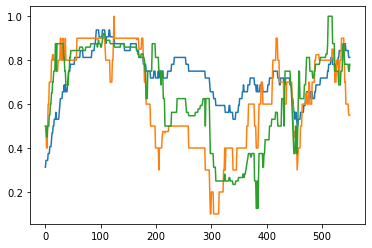

In [66]:
id = 10
plt.plot(players_nochange[id].estimate_container)
plt.plot(players_sourn[id].estimate_container)
plt.plot(players_perm[id].estimate_container)

print(len(players_nochange[10].estimate_container))

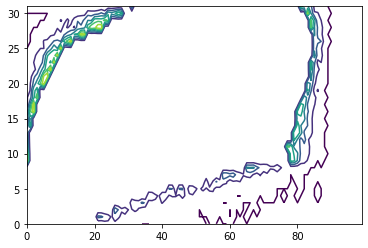

In [77]:
number_per_bin_rounded = nochange.number_per_bin
for i in range(nochange.number_per_bin.shape[0]):
    for j in range(nochange.number_per_bin.shape[1]):
        if nochange.number_per_bin[i,j] == 0 :
            number_per_bin_rounded[i,j] = 1



plt.contour(nochange.prop_correct / nochange.number_per_bin)
#plt.contour(nochange.fit_correct / nochange.number_per_bin, colors = ["red"])


/var/folders/80/5fffg6dx3rb7q3ffwrzchg7c0000gn/T/ipykernel_20952/4130513571.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.contour(sourn.prop_correct / sourn.number_per_bin)


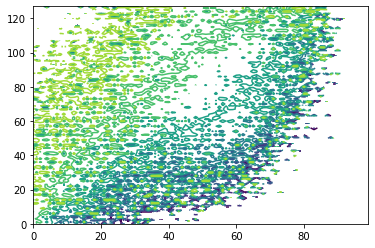

In [78]:
plt.contour(sourn.prop_correct / sourn.number_per_bin)
#plt.contour(sourn.fit_correct / sourn.number_per_bin, colors = "red")

[[ 683.  690.  431. ...    0.    0.    0.]
 [1118. 1171.  928. ...    0.    0.    0.]
 [ 664.  843.  610. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [2418. 2821. 2153. ...    0.    0.    0.]]


/var/folders/80/5fffg6dx3rb7q3ffwrzchg7c0000gn/T/ipykernel_20952/2694403018.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.contour(perm.prop_correct / perm.number_per_bin)


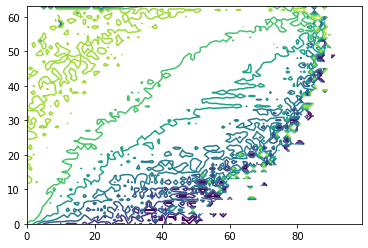

In [79]:
plt.contour(perm.prop_correct / perm.number_per_bin)
#plt.contour(perm.fit_correct / perm.number_per_bin,colors = ["red"])

print(perm.prop_correct)